In [1]:
import pandas as pd

In [2]:
df_train=pd.read_csv("Training Data.csv")
df_test=pd.read_csv("Test Data.csv")
df_train.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [3]:
df_test.head()

,id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11


In [4]:
df_train.isna().sum()

Id                     0
income                 0
age                    0
experience             0
married                0
house_ownership        0
car_ownership          0
profession             0
city                   0
state                  0
current_job_years      0
current_house_years    0
risk_flag              0
dtype: int64

In [5]:
df_train.dtypes

Id                      int64
income                  int64
age                     int64
experience              int64
married                object
house_ownership        object
car_ownership          object
profession             object
city                   object
state                  object
current_job_years       int64
current_house_years     int64
risk_flag               int64
dtype: object

**Encoding the categorical columns**

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_train['married']=le.fit_transform(df_train['married'])
df_test['married']=le.fit_transform(df_test['married'])
df_train['house_ownership']=le.fit_transform(df_train['house_ownership'])
df_test['house_ownership']=le.fit_transform(df_test['house_ownership'])
df_train['car_ownership']=le.fit_transform(df_train['car_ownership'])
df_test['car_ownership']=le.fit_transform(df_test['car_ownership'])
df_train['profession']=le.fit_transform(df_train['profession'])
df_test['profession']=le.fit_transform(df_test['profession'])
df_train['city']=le.fit_transform(df_train['city'])
df_test['city']=le.fit_transform(df_test['city'])
df_train['state']=le.fit_transform(df_train['state'])
df_test['state']=le.fit_transform(df_test['state'])
print(">>>\n>>>\n>>>Encoding complete.")

>>>
>>>
>>>Encoding complete.


In [7]:
df_train.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,1,2,0,33,251,13,3,13,0
1,2,7574516,40,10,1,2,0,43,227,14,9,13,0
2,3,3991815,66,4,0,2,0,47,8,12,4,10,0
3,4,6256451,41,2,1,2,1,43,54,17,2,12,1
4,5,5768871,47,11,1,2,0,11,296,22,3,14,1


In [8]:
df_test.head()

,id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years
0,1,7393090,59,19,1,2,0,26,181,28,4,13
1,2,1215004,25,5,1,2,0,24,131,14,5,10
2,3,8901342,50,12,1,2,0,30,290,14,9,14
3,4,1944421,49,9,0,2,1,1,171,14,3,12
4,5,13429,25,18,1,2,1,12,39,28,13,11


In [9]:
df_train.shape

(252000, 13)

In [10]:
df_test.shape

(28000, 12)

**Removing constant, quasi-constant, and primary key value**

In [11]:
df_train['house_ownership'].value_counts()/252000

2    0.920230
1    0.051262
0    0.028508
Name: house_ownership, dtype: float64

In [12]:
df_train['car_ownership'].value_counts()/252000

0    0.698413
1    0.301587
Name: car_ownership, dtype: float64

In [13]:
df_train['married'].value_counts()/252000

1    0.897905
0    0.102095
Name: married, dtype: float64

In [14]:
df_train.nunique(axis=1).sum()

2703410

In [15]:
#id is a primary key, so dropping it would be a good idea
df_train=df_train.drop("Id",axis=1)
df_test=df_test.drop("id",axis=1)

**Scaling our data**

In [16]:
from sklearn.preprocessing import MinMaxScaler

mm=MinMaxScaler()
scaled_data_train=mm.fit_transform(df_train)
scaled_data_test=mm.fit_transform(df_test)

In [17]:
df_train=pd.DataFrame(scaled_data_train,columns=df_train.columns)
df_train.head()

,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,0.129487,0.034483,0.15,1.0,1.0,0.0,0.66,0.794304,0.464286,0.214286,0.75,0.0
1,0.757206,0.327586,0.50,1.0,1.0,0.0,0.86,0.718354,0.500000,0.642857,0.75,0.0
2,0.398564,0.775862,0.20,0.0,1.0,0.0,0.94,0.025316,0.428571,0.285714,0.00,0.0
3,0.625263,0.344828,0.10,1.0,1.0,1.0,0.86,0.170886,0.607143,0.142857,0.50,1.0
4,0.576454,0.448276,0.55,1.0,1.0,0.0,0.22,0.936709,0.785714,0.214286,1.00,1.0


In [18]:
df_test=pd.DataFrame(scaled_data_test,columns=df_test.columns)
df_test.head()

,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years
0,0.739054,0.655172,0.95,1.0,1.0,0.0,0.52,0.572785,1.0,0.285714,0.75
1,0.120596,0.068966,0.25,1.0,1.0,0.0,0.48,0.414557,0.5,0.357143,0.00
2,0.890037,0.500000,0.60,1.0,1.0,0.0,0.60,0.917722,0.5,0.642857,1.00
3,0.193614,0.482759,0.45,0.0,1.0,1.0,0.02,0.541139,0.5,0.214286,0.50
4,0.000312,0.068966,0.90,1.0,1.0,1.0,0.24,0.123418,1.0,0.928571,0.25


**Exploratory Data Analysis**

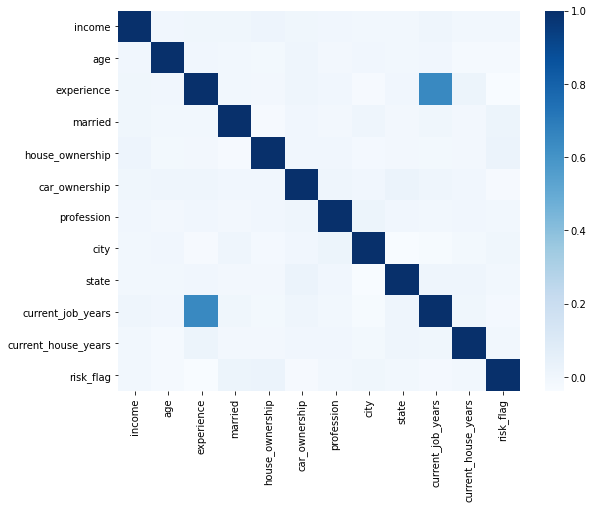

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(df_train.corr(),cmap="Blues")
sns.set()

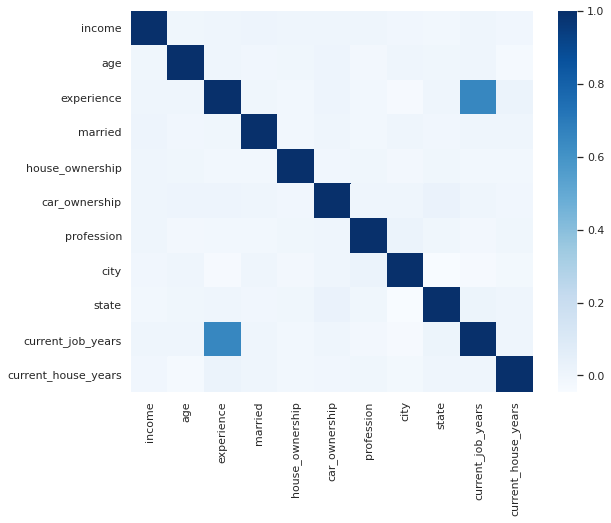

In [20]:
fig, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(df_test.corr(),cmap="Blues")
sns.set()

In [21]:
#Since current_job_years and experience is highly correlated, we might as well remove it.
df_train=df_train.drop("experience",axis=1)
df_test=df_test.drop("experience",axis=1)

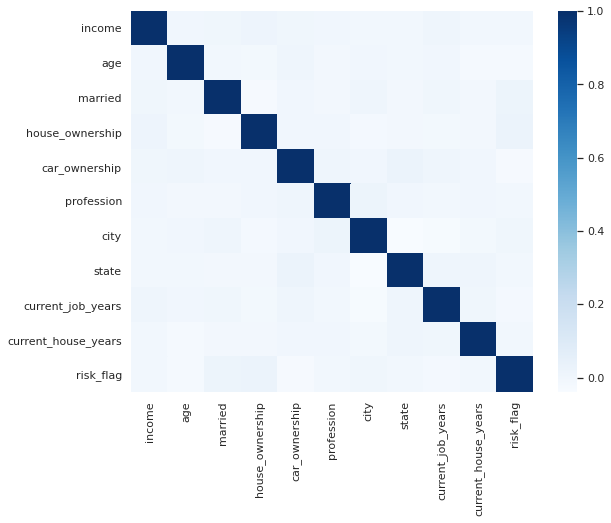

In [22]:
fig, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(df_train.corr(),cmap="Blues")
sns.set()

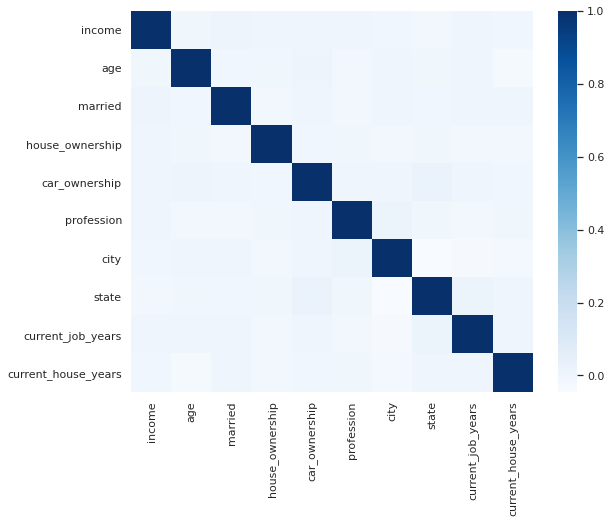

In [23]:
fig, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(df_test.corr(),cmap="Blues")
sns.set()

In [24]:
#Separating dependent and independent variables
X=df_train.drop(["risk_flag"],axis=1)
y=df_train["risk_flag"]

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=df_train['risk_flag'],random_state=10,test_size=0.2)

## Binary Classification using Neural Networks

In [26]:
import keras 
import tensorflow as tf
from keras.models import Sequential
from keras.layers import InputLayer, Dense, Dropout

**Structuring our neural network**

In [27]:
input_neurons=X_train.shape[1]
print(input_neurons)

10


In [28]:
#Defining hidden layers is arbitrary 
number_of_hidden_layers=2
neurons_hidden_layer_1=15
neurons_hidden_layer_2=8

In [29]:
model=Sequential()
model.add(InputLayer(input_shape=input_neurons))
model.add(Dense(units=neurons_hidden_layer_1,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=neurons_hidden_layer_2,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1,activation='sigmoid'))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                165       
_________________________________________________________________
dropout (Dropout)            (None, 15)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 302
Trainable params: 302
Non-trainable params: 0
_________________________________________________________________


**Compiling our model**

In [31]:
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=['accuracy'])

In [32]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
es=EarlyStopping(monitor='val_loss',min_delta=0.01,patience=10,mode='min')
mc=ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)

In [33]:
h_callback=model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test),batch_size=128,callbacks=[mc,es])

Epoch 1/50
1575/1575 [==============================] - 6s 3ms/step - loss: 0.4209 - accuracy: 0.8658 - val_loss: 0.3740 - val_accuracy: 0.8770
Epoch 2/50
1575/1575 [==============================] - 4s 3ms/step - loss: 0.3787 - accuracy: 0.8769 - val_loss: 0.3721 - val_accuracy: 0.8770
Epoch 3/50
1575/1575 [==============================] - 4s 3ms/step - loss: 0.3752 - accuracy: 0.8771 - val_loss: 0.3719 - val_accuracy: 0.8770
Epoch 4/50
1575/1575 [==============================] - 4s 3ms/step - loss: 0.3744 - accuracy: 0.8765 - val_loss: 0.3714 - val_accuracy: 0.8770
Epoch 5/50
1575/1575 [==============================] - 4s 3ms/step - loss: 0.3724 - accuracy: 0.8773 - val_loss: 0.3711 - val_accuracy: 0.8770
Epoch 6/50
1575/1575 [==============================] - 4s 3ms/step - loss: 0.3734 - accuracy: 0.8764 - val_loss: 0.3709 - val_accuracy: 0.8770
Epoch 7/50
1575/1575 [==============================] - 4s 3ms/step - loss: 0.3701 - accuracy: 0.8779 - val_loss: 0.3709 - val_accuracy:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 'i' instances.
A proxy artist may be used instead.
See: http:/

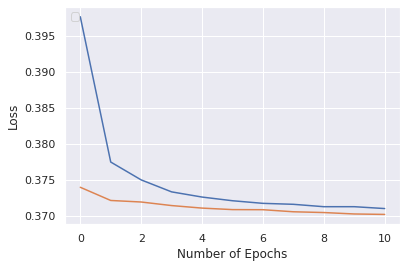

In [35]:
#Summarizing history for loss
plt.plot(h_callback.history['loss'])
plt.plot(h_callback.history['val_loss'])
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend("train","validation",loc='upper left')

## Ensemble Learning

In [53]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model_bg = BaggingClassifier(tree.DecisionTreeClassifier(random_state=10))
model_bg.fit(X_train, y_train)
print("Training complete.")
model_bg.score(X_test,y_test)

Training complete.


0.8970634920634921

In [38]:
import xgboost as xgb
model_xgb=xgb.XGBClassifier(random_state=10,learning_rate=0.01)
model_xgb.fit(X_train, y_train)
print("Training complete.")
model_xgb.score(X_test,y_test)

Training complete.


0.8771230158730159

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
model_gbc= GradientBoostingClassifier(learning_rate=0.01,random_state=1)
model_gbc.fit(X_train, y_train)
print("Training complete.")
model_gbc.score(X_test,y_test)

Training complete.


0.8770039682539682

In [50]:
bg = BaggingClassifier(tree.DecisionTreeClassifier(random_state=10))
bg.fit(X, y)
print("Training complete.")

Training complete.


In [51]:
y_pred=bg.predict(df_test)

In [52]:
import numpy as np
unique_elements, counts_elements = np.unique(y_pred, return_counts=True)

for i in range(0,2):
  print(f"{unique_elements[i]}:{counts_elements[i]}")

0.0:24798
1.0:3202


**Calculating roc_auc_score and plotting ROC Curve**

In [56]:
predict_prob=bg.predict_proba(X_test)
from sklearn.metrics import roc_curve, roc_auc_score
fpr1, tpr1, thresh1 = roc_curve(y_test, predict_prob[:,1], pos_label=1)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [57]:
auc_score1 = roc_auc_score(y_test, predict_prob[:,1])
print(auc_score1)

0.9740776964185579


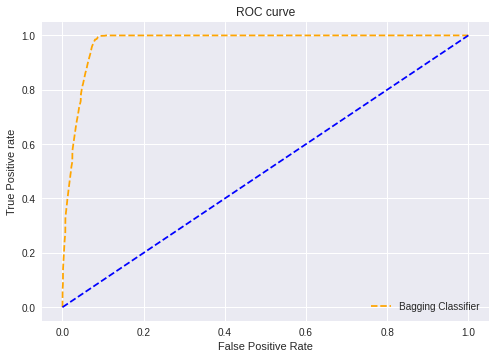

In [58]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Bagging Classifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

In [59]:
DF = pd.DataFrame(y_pred)
DF.to_csv("predictions.csv")